# <font color = lightcoral>Inference Testing
>    
### <font color = red> Non-Overlapping Windows

> From transformer models
>

## <font color = grey> Admin

In [1]:
import pandas as pd
import os
import gzip
import time
import warnings
import os
import shutil
from datetime import datetime
import time
# Set display option to show the full length of the column
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

# Determine the base directory based on the effective user ID
if os.geteuid() == 0:  # root user
    base_dir = '/root'
else:
    base_dir = '/home/sagemaker-user'

# Set the environment variable
os.environ['BASE_DIR'] = base_dir

# Verify the base directory
print(f"Base directory set to: {base_dir}")

import warnings
warnings.simplefilter("ignore")


Base directory set to: /home/sagemaker-user


---

# <font color = lightsteelblue> 4 Key Files

In [2]:
import pandas as pd
import time

data_dir = '/home/ubuntu/efs-w210-capstone-ebs/04A.Local_Data_Files'

################################## Part 1: Parsed Raw File ###################################

print("\n" + "*"*100)
print("********************** Part1 1: Parsed Raw File ******************************************")
print("*"*100 + "\n")

parsed_file =  f"{data_dir}/BGL.log_structured.csv"
parsed_file_df = pd.read_csv(parsed_file)
display(parsed_file_df.head())

######################### Part 2: Encoded File with Feature for Model Training  ######################

print("\n" + "*"*100)
print("********************** Part 2:  Input Data with Features ******************************************")
print("*"*100 + "\n")

encoded_feature_input_file = f"{data_dir}/20240709_full_more_new_features_v1.00.parquet"
encoded_feature_input_file_df = pd.read_parquet(encoded_feature_input_file)
display(encoded_feature_input_file_df.iloc[:, :20].head())

# ######################### Part 3: Event_ID to Template Mapping  #######################################

print("\n" + "*"*100)
print("********************** Part 3: Event_ID to Template Mapping ******************************************")
print("*"*100 + "\n")

eventid_template_file = f"{data_dir}/20240711_Template_to_EventID_Mapping_v1.00.csv"
eventid_template_df = pd.read_csv(eventid_template_file)
display(eventid_template_df.head())

# ######################### Part 4: Event_ID to Encoding Mapping  #######################################

print("\n" + "*"*100)
print("********************** Part 4:  Event_ID to Encoding Mapping ******************************************")
print("*"*100 + "\n")

eventid_encoding_file = f"{data_dir}/20240711_EventID_to_EncodedInteger_Mapping_v1.00.csv"
eventid_encoding_df = pd.read_csv(eventid_encoding_file)
display(eventid_encoding_df.head())


****************************************************************************************************
********************** Part1 1: Parsed Raw File ******************************************
****************************************************************************************************



,LineId,Label,Id,Date,Code1,Time,Code2,Component1,Component2,Level,Content,EventId,EventTemplate
0,1,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.363779,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected
1,2,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.527847,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected
2,3,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.675872,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected
3,4,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.823719,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected
4,5,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.982731,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected



****************************************************************************************************
********************** Part 2:  Input Data with Features ******************************************
****************************************************************************************************



,time_start,time_start_int,Class,unique_events,most_frequent_event,transitions,entropy,hour_of_day,day_of_week,event_count,top_event_frequency,prev_event_count,transition_rate,high_transition_rate,prev_entropy,entropy_change,rolling_event_count,rolling_unique_event_count,EventId_1,EventId_2
4,2005-06-03 16:00:00,4,0,6,228,6,0.171708,16,4,465,35431,913.0,0.012903,0,0.000000,0.171708,4895.0,18.0,228,228
5,2005-06-03 16:05:00,5,0,2,987,2,0.598270,16,4,7,35433,465.0,0.285714,0,0.171708,0.426562,4257.0,19.0,729,987
6,2005-06-03 16:10:00,6,0,6,399,18,0.655243,16,4,81,35431,7.0,0.222222,0,0.598270,0.056973,2756.0,23.0,734,430
7,2005-06-03 16:15:00,7,0,5,328,6,1.039660,16,4,66,35431,81.0,0.090909,0,0.655243,0.384418,1532.0,25.0,987,987
8,2005-06-03 16:25:00,9,0,4,399,3,0.895333,16,4,14,35433,66.0,0.214286,0,1.039660,-0.144328,633.0,28.0,95,504



****************************************************************************************************
********************** Part 3: Event_ID to Template Mapping ******************************************
****************************************************************************************************



,EventId,EventTemplate,Occurrences
0,3aa50e45,instruction cache parity error corrected,105924
1,b9250ad9,MidplaneSwitchController performing bit sparing on R<*>-M<*>-L<*>-U<*>-C bit <*>,964
2,fc5f0940,generating core.<*>,1706751
3,1840cbfe,"<*> ddr errors(s) detected and corrected on rank <*>, symbol <*>, bit <*>",33939
4,828a502b,<*> <*> <*> error(s) (dcr <*>) detected and corrected,5040



****************************************************************************************************
********************** Part 4:  Event_ID to Encoding Mapping ******************************************
****************************************************************************************************



,EventId,EncodedValue
0,0025df56,0
1,0045c3a8,1
2,004a68ba,2
3,00980b01,3
4,00d49120,4


---

# <font color = tomato> Model Eval from saved model (#72)
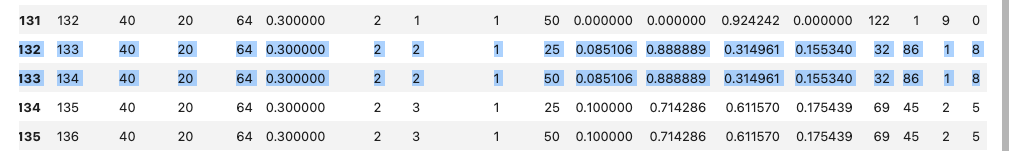

# <font color = gold> Inference Works!

In [3]:
import os
import pandas as pd
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
import numpy as np
import random

################################### Parameters ################################

# Parameters
data_dir = '/home/ubuntu/efs-w210-capstone-ebs/04A.Local_Data_Files'
input_file = f"{data_dir}/20240709_full_more_new_features_v1.00.parquet"
model_folder_path = '/home/ubuntu/efs-w210-capstone-ebs/04B.Local_Model_Files/20240713_Non_Overlapping_Consl_180_FINAL'
trained_model_file = f"{model_folder_path}/20240712_Transformers_Non_Overlapping_run_133_of_180.pt"

# Required parameters for defining the model
max_events = 40
input_length = 20
hidden_size = 64
dropout = 0.3
num_layers = 2
gap = 2
prediction_period = 1

# Other parameters
test_size = 0.2
shuffle = False
random_seed = 42

# Set random seed for reproducibility
np.random.seed(random_seed)
random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)

################################### Data Preprocessing ################################

# Load the data
df = pd.read_parquet(input_file)

# Select derived features and a subset of EventID columns
selected_columns = ['time_start_int', 'Class', 'unique_events', 'most_frequent_event', 'transitions', 'entropy', 
                    'hour_of_day', 'day_of_week', 'event_count', 'top_event_frequency', 'prev_event_count', 
                    'transition_rate', 'high_transition_rate', 'prev_entropy', 'entropy_change', 
                    'rolling_event_count', 'rolling_unique_event_count']
event_id_columns = [col for col in df.columns if col.startswith('EventId_')]

# Replace -1 values with 0
df[event_id_columns].replace(-1, 0, inplace=True)

# Scale numerical features
scaler = StandardScaler()
numerical_features = ['unique_events', 'transitions', 'entropy', 'hour_of_day', 'day_of_week', 'event_count', 
                      'top_event_frequency', 'prev_event_count', 'transition_rate', 'prev_entropy', 
                      'entropy_change', 'rolling_event_count', 'rolling_unique_event_count']
df[selected_columns[2:]] = scaler.fit_transform(df[selected_columns[2:]])

# Encode categorical features
label_encoder = LabelEncoder()
df['most_frequent_event'] = label_encoder.fit_transform(df['most_frequent_event'])

# Apply PCA to EventID columns to reduce them to the number of features specified by max_events
pca = PCA(n_components=max_events)
event_id_pca = pca.fit_transform(df[event_id_columns])

# Create a new DataFrame with the reduced EventID features
event_id_pca_df = pd.DataFrame(event_id_pca, columns=[f'EventId_PCA_{i+1}' for i in range(max_events)])

# Combine the reduced EventID features with the selected columns
df_reduced = pd.concat([df[selected_columns], event_id_pca_df], axis=1)

# Verify the number of features
input_size = df_reduced.shape[1] - 2  # Subtract 2 for 'Class' and 'time_start_int' columns

################################### Create Sequences ################################

def create_sequences(data, time_index_col, feature_cols, target_col, input_length, gap=2, prediction_period=1):
    sequences = []
    targets = []
    
    start_idx = 0
    total_length = len(data)
    while start_idx + input_length + gap + prediction_period <= total_length:
        end_idx = start_idx + input_length
        sequence = data[feature_cols].iloc[start_idx:end_idx].values
        target = data[target_col].iloc[end_idx + gap:end_idx + gap + prediction_period].values[0]
        sequences.append(sequence)
        targets.append(target)
        start_idx = end_idx + gap + prediction_period  # Move to the next non-overlapping sequence
    
    return np.array(sequences), np.array(targets)

feature_cols = [col for col in df_reduced.columns if col != 'Class']
target_col = 'Class'

X, y = create_sequences(df_reduced, 'time_start_int', feature_cols, target_col, input_length=input_length, gap=gap, prediction_period=prediction_period)

################################### Split Data ################################

# Ensure the same split as during training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=shuffle, random_state=random_seed)

# Drop the first column from X_test
input_size = X_test.shape[2]
X_test = X_test.reshape(X_test.shape[0], input_length, input_size)
X_test = X_test[:, :, 1:]

################################### Transformer Model Definition ################################

class TransformerModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, dropout=0.5):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_size, hidden_size)
        self.pos_encoder = nn.Embedding(input_length, hidden_size)
        self.transformer = nn.Transformer(hidden_size, nhead=4, num_encoder_layers=num_layers, num_decoder_layers=num_layers, dropout=dropout)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x = self.embedding(x)
        positions = torch.arange(0, x.size(1), device=x.device).unsqueeze(0)
        x = x + self.pos_encoder(positions)
        x = self.transformer(x, x)
        x = self.fc(x[:, -1, :])
        return x

################################### Model Evaluation ################################

# Convert data to PyTorch tensors
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Initialize the model and load the trained model
model = TransformerModel(input_size - 1, hidden_size, num_layers, 1, dropout)  # Correct input size
model.load_state_dict(torch.load(trained_model_file))

# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    test_outputs = torch.sigmoid(test_outputs)  # Apply sigmoid to get probabilities
    test_outputs = test_outputs.cpu().numpy()

    test_preds = (test_outputs > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate evaluation metrics
conf_matrix = confusion_matrix(y_test_tensor.cpu().numpy(), test_preds)
precision = precision_score(y_test_tensor.cpu().numpy(), test_preds, zero_division=0)
recall = recall_score(y_test_tensor.cpu().numpy(), test_preds, zero_division=0)
accuracy = accuracy_score(y_test_tensor.cpu().numpy(), test_preds)
f1 = f1_score(y_test_tensor.cpu().numpy(), test_preds, zero_division=0)
tn, fp, fn, tp = conf_matrix.ravel()

# Print the evaluation results
print(f"Evaluation Results: Precision={precision:.6f}, Recall={recall:.6f}, Accuracy={accuracy:.6f}, F1={f1:.6f}, TN={tn}, FP={fp}, FN={fn}, TP={tp}")

Evaluation Results: Precision=0.085106, Recall=0.888889, Accuracy=0.314961, F1=0.155340, TN=32, FP=86, FN=1, TP=8


----